In [1]:
!pip install -Uqq fastai
!pip install -Uqq timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.6 MB/s eta 0:00:00


In [2]:
from fastai.vision.all import *
import timm

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [5]:
!ls /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach

png.zip


In [6]:
%cd /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach

/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach


In [7]:
!ls

png.zip


In [9]:
!unzip '/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png.zip' -d '/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach'

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/1_1.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_3.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/1_11.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/1_14.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_23.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/1_25.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_26.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_32.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/1_31.png  
  inflating: /content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_35.png  
  inflating

In [10]:
path = Path('/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach')

In [11]:
files = get_image_files(path)
files[0]

Path('/content/gdrive/MyDrive/dissertation/random_des_10000_dscapproach/png/0_1.png')

In [12]:
len(files)

10000

In [13]:
pat = r'^(.*)_\d+.png'

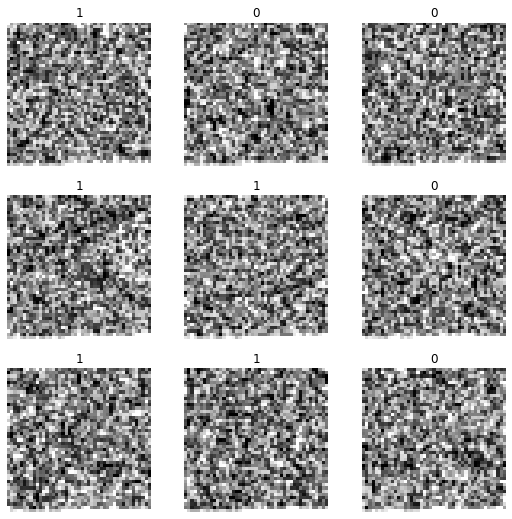

In [14]:
dls1 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(45))
dls1.show_batch()

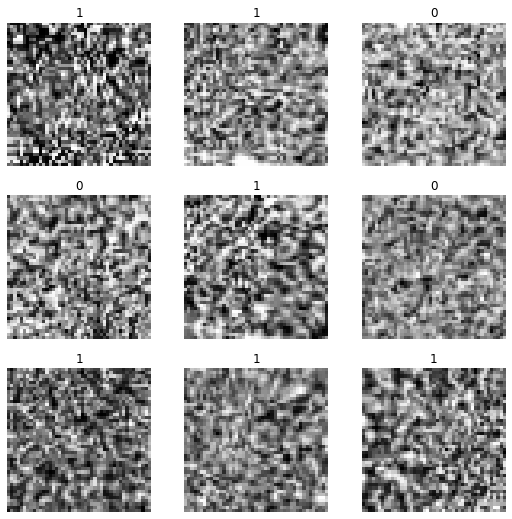

In [15]:
dls2 = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=RandomResizedCrop(45, min_scale=0.5), batch_tfms=aug_transforms())#data augmentation
dls2.show_batch()

In [17]:
def runit(dls,architecture,epochs):
  learn = vision_learner(dls, architecture , metrics=accuracy)
  x = learn.lr_find(suggest_funcs=(slide, valley))
  lr = (x[0]+x[1])/2.0
  learn.fine_tune(epochs,lr)
  learn.show_results()
  return learn

#Densenet121

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/densenet121_ra-50efcf5c.pth" to /root/.cache/torch/hub/checkpoints/densenet121_ra-50efcf5c.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.196989,1.004653,0.491500,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.877169,0.841199,0.485500,00:45
1,0.782787,0.753047,0.503000,00:45
2,0.735078,0.749346,0.479500,00:43
3,0.705464,0.739776,0.490500,00:42
4,0.698476,0.732281,0.482500,00:45
5,0.681556,0.740412,0.488000,00:46
6,0.672867,0.752254,0.499000,00:45
7,0.652602,0.763351,0.474000,00:43
8,0.645532,0.761699,0.479000,00:43
9,0.633441,0.765371,0.482000,00:45


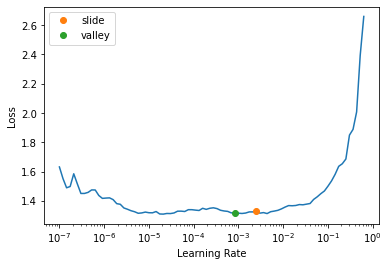

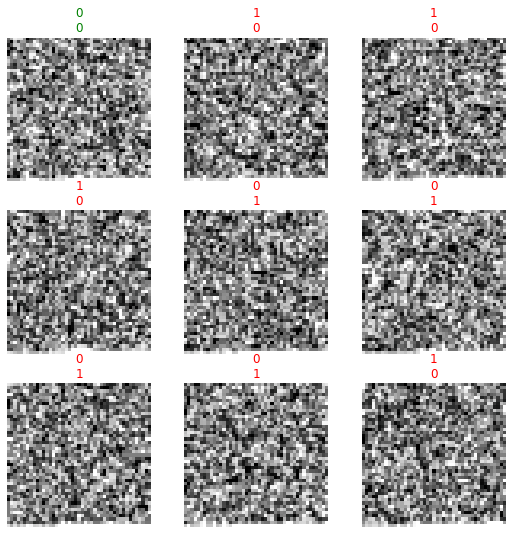

In [18]:
res_2_dense = runit(dls1, 'densenet121', 10)

epoch,train_loss,valid_loss,accuracy,time
0,1.052324,0.747196,0.514500,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.738887,0.865338,0.506000,00:48
1,0.728566,0.868374,0.495500,00:46
2,0.747798,2.973528,0.495500,00:44
3,0.744464,0.802563,0.504500,00:43
4,0.736002,1.205120,0.492000,00:44
5,0.729355,1.139954,0.504500,00:42
6,0.716531,1.101962,0.496000,00:43
7,0.707714,0.954054,0.505000,00:42
8,0.702374,0.729705,0.505000,00:43
9,0.701185,0.917537,0.506500,00:42


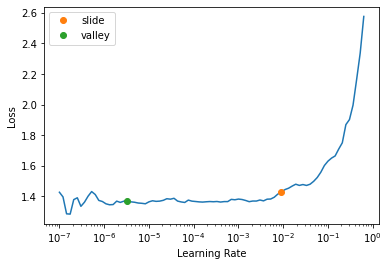

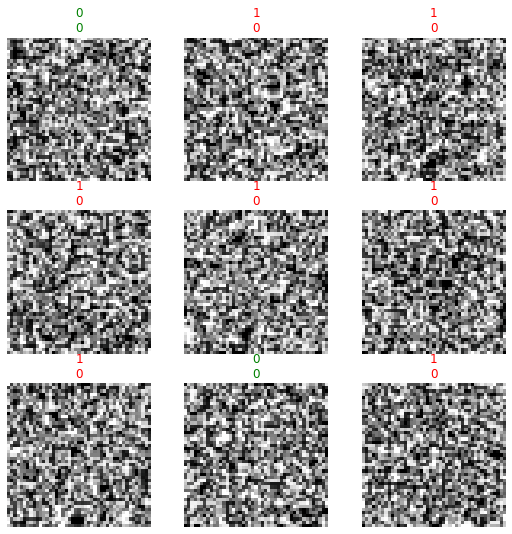

In [19]:
res_dense = runit(dls2, 'densenet121' , 10)

#DarkNet

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/darknet53_256_c2ns-3aeff817.pth" to /root/.cache/torch/hub/checkpoints/darknet53_256_c2ns-3aeff817.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.973637,0.793356,0.488000,00:32


epoch,train_loss,valid_loss,accuracy,time
0,0.747444,0.719179,0.483500,00:36
1,0.725572,0.714807,0.487500,00:33
2,0.747614,0.741690,0.498500,00:33
3,0.732728,0.790391,0.488500,00:35
4,0.688429,0.839651,0.478500,00:32
5,0.585314,0.910325,0.499500,00:34
6,0.456503,1.024688,0.488500,00:35
7,0.367426,1.235952,0.479000,00:38
8,0.295326,1.306839,0.488000,00:33
9,0.276895,1.329628,0.476500,00:36


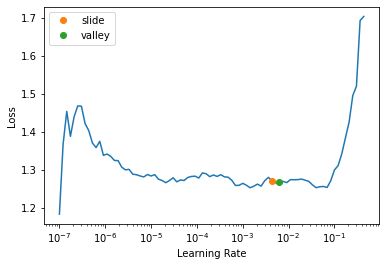

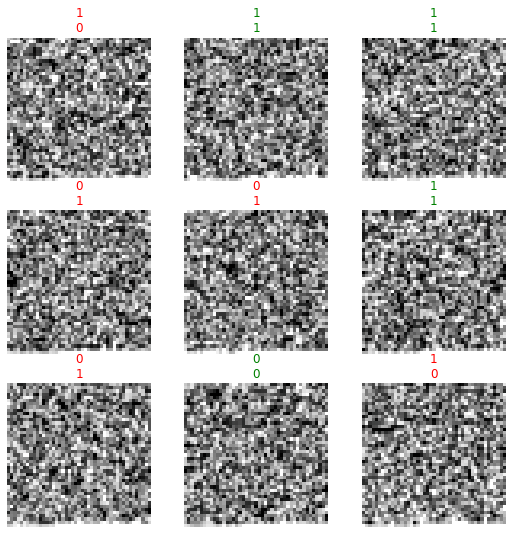

In [20]:
darknet_1 = runit(dls1, 'darknet53',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.018170,0.775480,0.511000,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.812515,0.724788,0.521000,00:34
1,0.764158,0.749887,0.498000,00:33
2,0.747427,0.721290,0.513500,00:33
3,0.733783,0.701543,0.509500,00:33
4,0.721423,0.719213,0.495000,00:34
5,0.714681,0.704368,0.484500,00:32
6,0.720792,0.709104,0.489000,00:33
7,0.718539,0.695074,0.502000,00:34
8,0.706357,0.709497,0.494000,00:32
9,0.706498,0.693645,0.504000,00:33


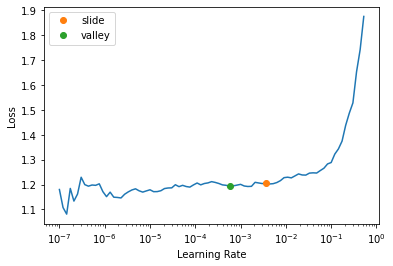

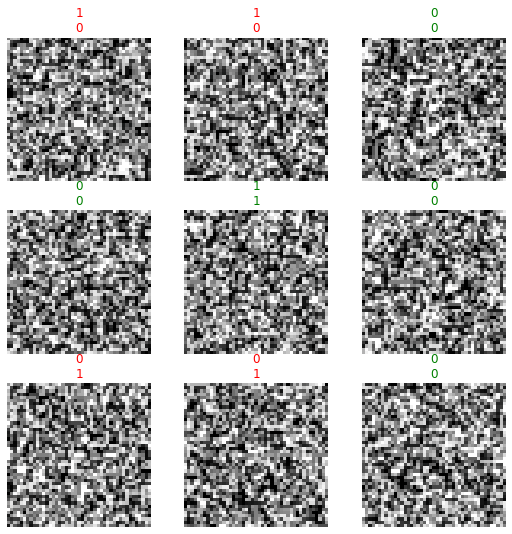

In [21]:
darknet_2 = runit(dls2, 'darknet53',10)

#ConvNext

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/convnext_nano_d1h-7eb4bdea.pth" to /root/.cache/torch/hub/checkpoints/convnext_nano_d1h-7eb4bdea.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.037416,0.800510,0.492000,00:29


epoch,train_loss,valid_loss,accuracy,time
0,0.791010,0.714112,0.505500,00:35
1,0.759091,0.713828,0.512500,00:39
2,0.735653,0.718215,0.505500,00:34
3,0.723123,0.745535,0.491500,00:33
4,0.705992,0.709493,0.499000,00:32
5,0.701092,0.720537,0.499000,00:34
6,0.655791,0.746345,0.501500,00:32
7,0.615778,0.779990,0.504000,00:32
8,0.590730,0.804309,0.503500,00:34
9,0.559917,0.807980,0.506000,00:32


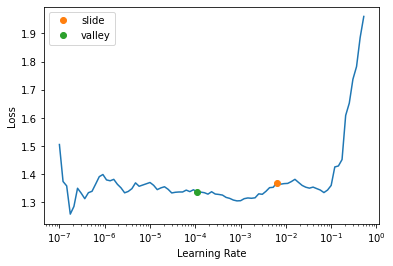

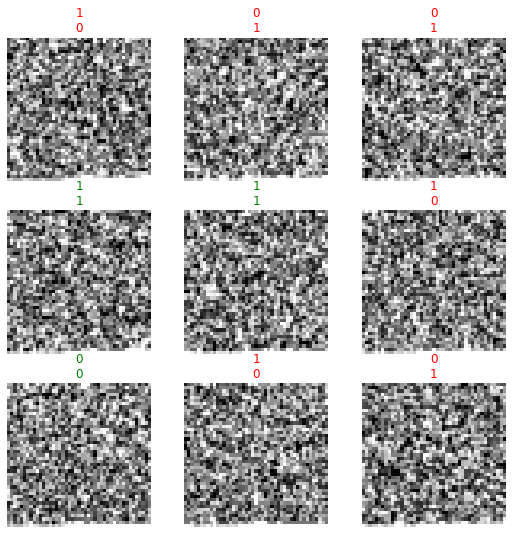

In [22]:
convnext_1 = runit(dls1, 'convnext_nano',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.083860,0.835067,0.493500,00:31


epoch,train_loss,valid_loss,accuracy,time
0,0.861368,0.711020,0.502000,00:31
1,0.816934,0.696652,0.507500,00:31
2,0.762106,0.694804,0.513000,00:33
3,0.745038,0.695869,0.513500,00:32
4,0.726253,0.693166,0.496500,00:31
5,0.718220,0.694644,0.493500,00:32
6,0.719776,0.697266,0.496000,00:33
7,0.708813,0.694483,0.483500,00:31
8,0.706272,0.694856,0.498000,00:31
9,0.708786,0.694694,0.491000,00:33


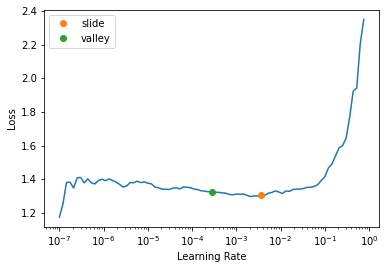

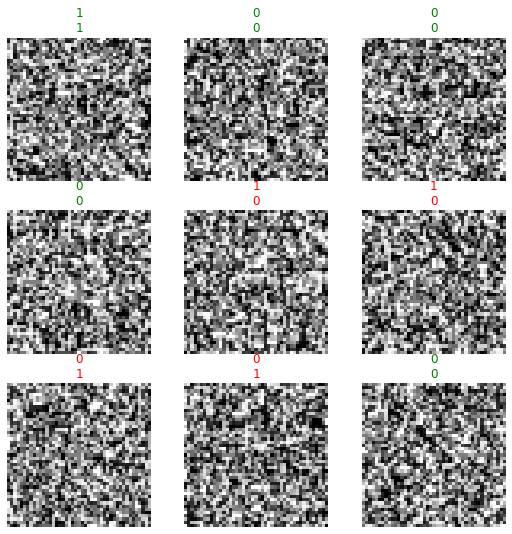

In [23]:
convnext_2 = runit(dls2, 'convnext_nano',10)

#pnasnet5large

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/pnasnet5large-bf079911.pth" to /root/.cache/torch/hub/checkpoints/pnasnet5large-bf079911.pth


epoch,train_loss,valid_loss,accuracy,time
0,0.965508,1.027120,0.492000,00:49


epoch,train_loss,valid_loss,accuracy,time
0,0.871645,0.874402,0.513500,01:02
1,0.820034,0.870379,0.492500,01:02
2,0.792251,0.829749,0.485500,01:04
3,0.771601,0.777609,0.507000,01:04
4,0.736943,0.803283,0.504000,01:01
5,0.731153,0.792074,0.514000,01:04
6,0.717668,0.816869,0.500000,01:03
7,0.698434,0.814889,0.505000,01:03
8,0.690899,0.861840,0.495000,01:01
9,0.675722,0.816160,0.505500,01:03


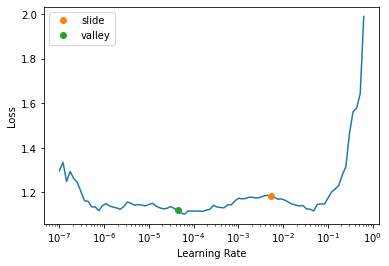

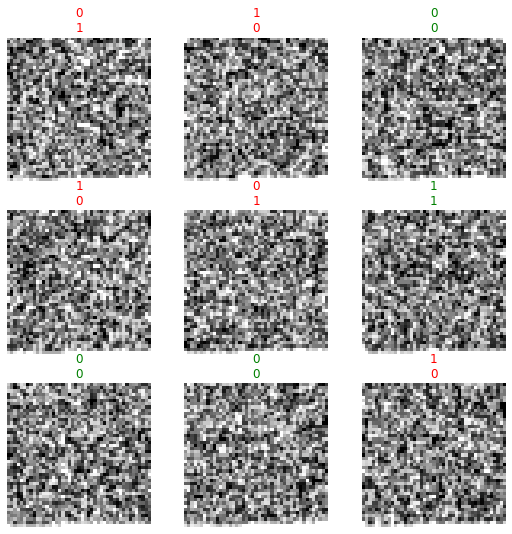

In [24]:
pnasnet1 = runit(dls1, 'pnasnet5large',10)

epoch,train_loss,valid_loss,accuracy,time
0,0.980036,1.149477,0.504500,00:47


epoch,train_loss,valid_loss,accuracy,time
0,0.828252,0.766800,0.489500,01:05
1,0.801810,0.843690,0.494000,01:06
2,0.809984,0.833353,0.491000,01:05
3,0.781340,0.970596,0.497000,01:05
4,0.797599,0.793394,0.501500,01:05
5,0.759476,0.926919,0.498500,01:06
6,0.738572,0.737232,0.497000,01:05
7,0.739604,0.742979,0.499000,01:04
8,0.720483,0.718380,0.499500,01:08
9,0.722466,0.703700,0.489000,01:05


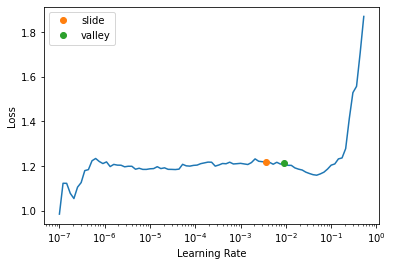

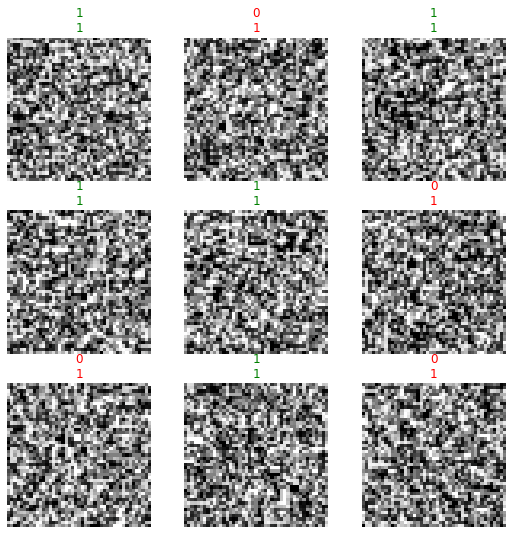

In [25]:
pnasnet2 = runit(dls2, 'pnasnet5large',10)

#ResNext101_64x4d

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-tpu-weights/resnext101_64x4d_c-0d0e0cc0.pth" to /root/.cache/torch/hub/checkpoints/resnext101_64x4d_c-0d0e0cc0.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.190652,0.823791,0.469000,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.780721,0.729308,0.487000,00:47
1,0.730412,0.746519,0.496000,00:47
2,0.717061,0.723547,0.518000,00:45
3,0.720449,0.724959,0.510500,00:45
4,0.707516,0.717723,0.497500,00:48
5,0.690348,0.726472,0.507500,00:45
6,0.681578,0.729038,0.505000,00:46
7,0.659950,0.745616,0.507500,00:45
8,0.649846,0.738897,0.495000,00:47
9,0.633471,0.748477,0.494500,00:46


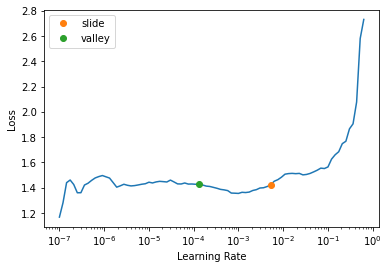

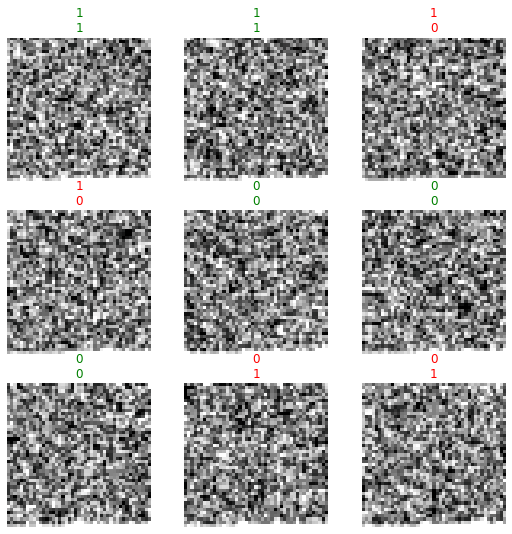

In [26]:
resnext1 = runit(dls1, 'resnext101_64x4d',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.026746,0.749379,0.500000,00:42


epoch,train_loss,valid_loss,accuracy,time
0,0.744426,0.712880,0.502500,00:46
1,0.726563,0.708474,0.498500,00:46
2,0.739911,0.724571,0.515000,00:47
3,0.735937,0.713505,0.501500,00:45
4,0.735262,0.711262,0.495500,00:47
5,0.722713,0.717550,0.506500,00:46
6,0.719218,0.709382,0.498000,00:45
7,0.709144,0.703870,0.496500,00:47
8,0.702716,0.694657,0.494000,00:48
9,0.703038,0.696220,0.492500,00:45


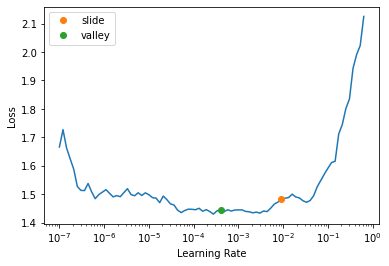

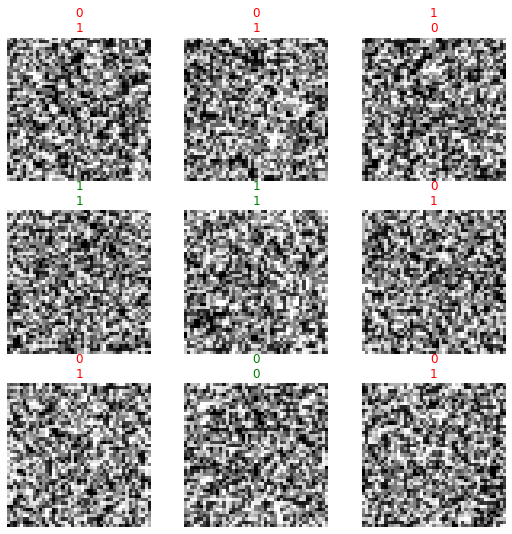

In [27]:
resnext2 = runit(dls2, 'resnext101_64x4d',10)

#ResNet152

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-rsb-weights/resnet152_a1h-dc400468.pth" to /root/.cache/torch/hub/checkpoints/resnet152_a1h-dc400468.pth


epoch,train_loss,valid_loss,accuracy,time
0,1.134756,0.918352,0.505000,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.769731,1.013395,0.496500,00:47
1,0.733799,0.741863,0.509500,00:45
2,0.724519,0.701144,0.514000,00:47
3,0.719521,0.725030,0.506000,00:46
4,0.712470,0.719727,0.477000,00:45
5,0.711242,0.710242,0.495500,00:46
6,0.707240,0.699765,0.490500,00:46
7,0.701452,0.705536,0.492500,00:46
8,0.696917,0.704684,0.515000,00:45
9,0.694369,0.706092,0.504500,00:45


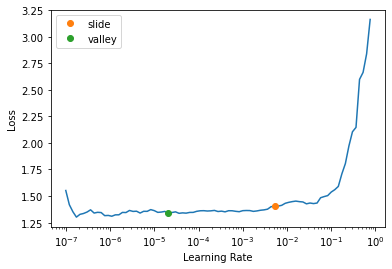

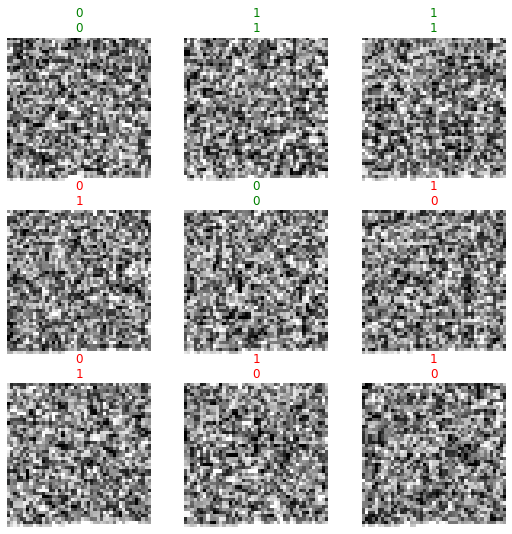

In [28]:
resnet1 = runit(dls1, 'resnet152',10)

epoch,train_loss,valid_loss,accuracy,time
0,1.013907,1.191566,0.492500,00:40


epoch,train_loss,valid_loss,accuracy,time
0,0.744977,0.913641,0.504000,00:47
1,0.725718,0.729632,0.510000,00:46
2,0.738406,0.739286,0.485000,00:45
3,0.731372,0.764455,0.490000,00:47
4,0.728196,0.823258,0.505000,00:45
5,0.720794,0.706208,0.511500,00:48
6,0.714434,0.699565,0.501000,00:45
7,0.707977,0.707680,0.499500,00:45
8,0.701717,0.701295,0.496000,00:47
9,0.699460,0.696287,0.483000,00:48


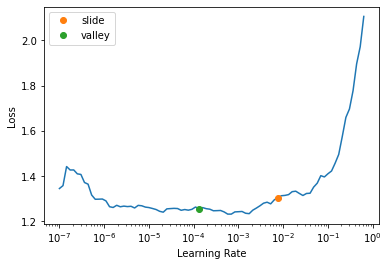

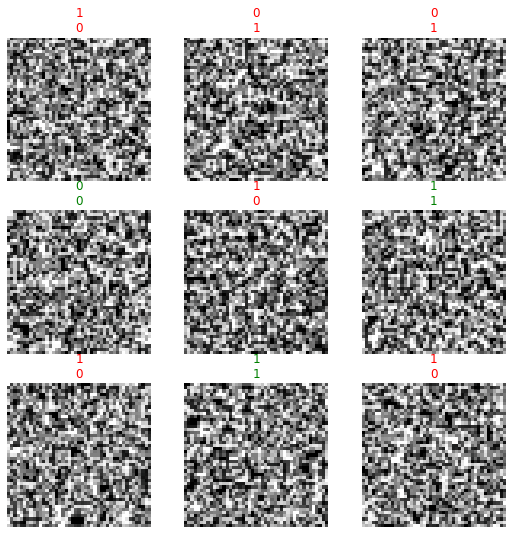

In [29]:
resnet2 = runit(dls2, 'resnet152',10)